In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("~/Desktop/forestfires.csv")
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df = pd.DataFrame(data)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
#check for the null values 
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
# Exploratory Data Analysis (EDA)

In [6]:
#summary statistics
print(df.describe().T)

      count        mean         std   min    25%     50%     75%      max
X     517.0    4.669246    2.313778   1.0    3.0    4.00    7.00     9.00
Y     517.0    4.299807    1.229900   2.0    4.0    4.00    5.00     9.00
FFMC  517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC   517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC    517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI   517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp  517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH    517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind  517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain  517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area  517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84


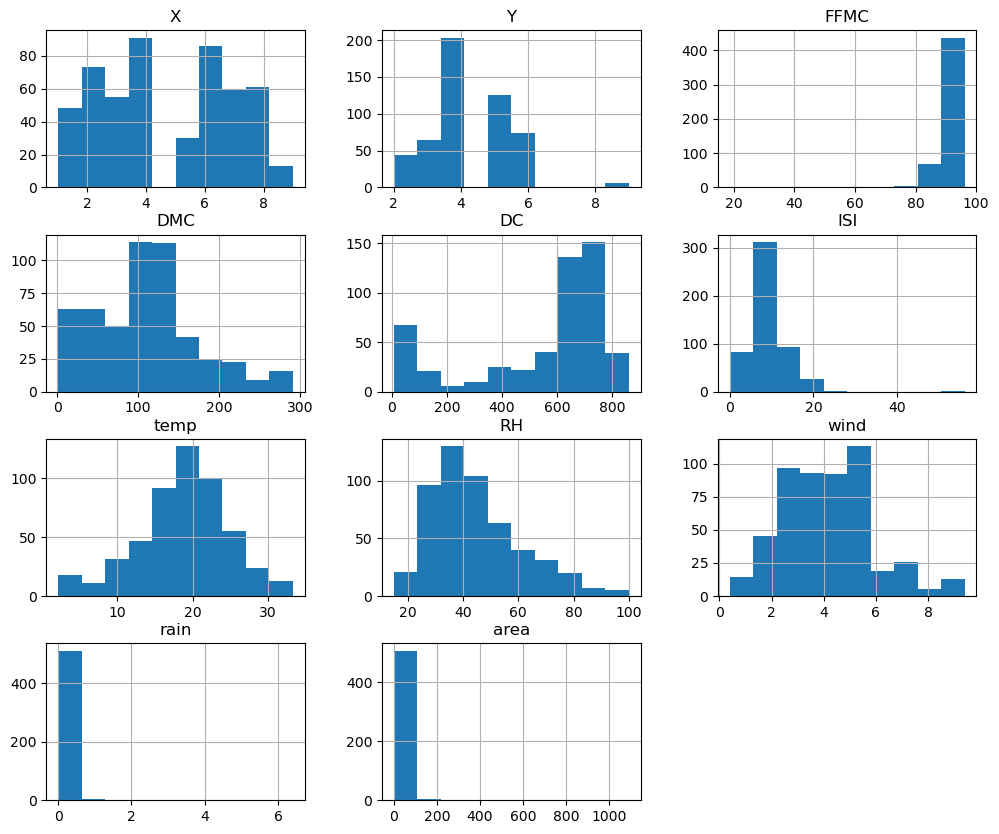

In [7]:
#Histogram for all numeric variables 
df.hist(figsize= (12,10))
plt.show()

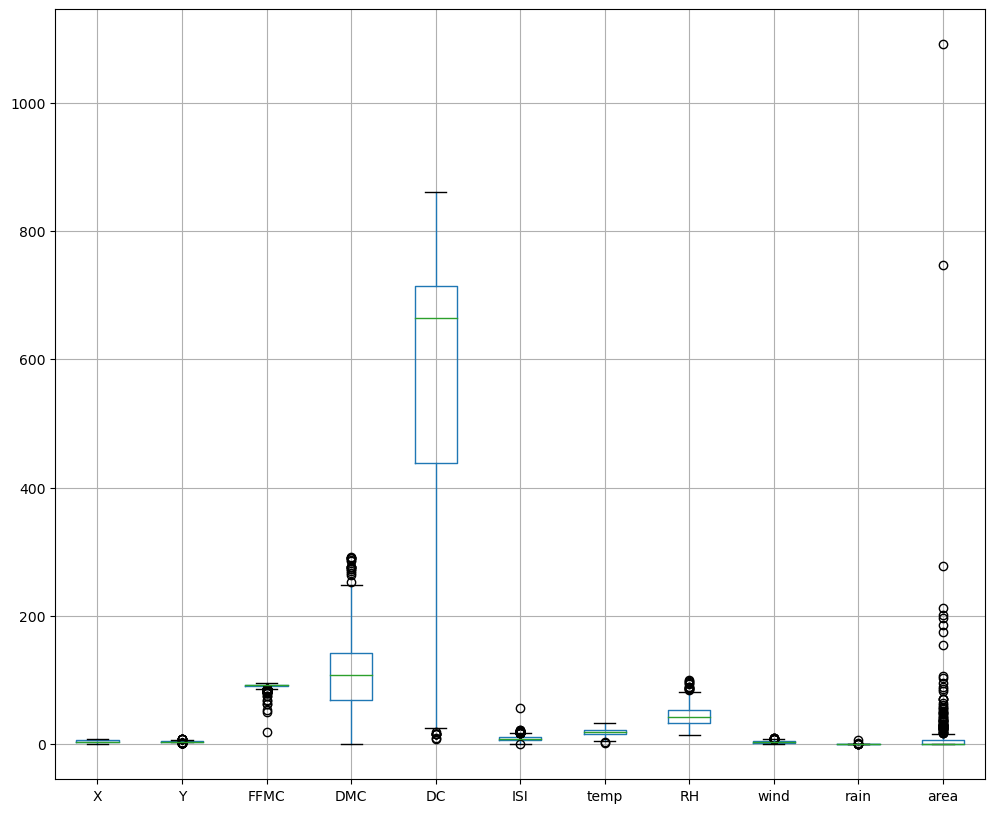

In [8]:
#boxplot for detect outliers 
df.boxplot(figsize = (12,10))
plt.show()

In [9]:
import seaborn as sns 

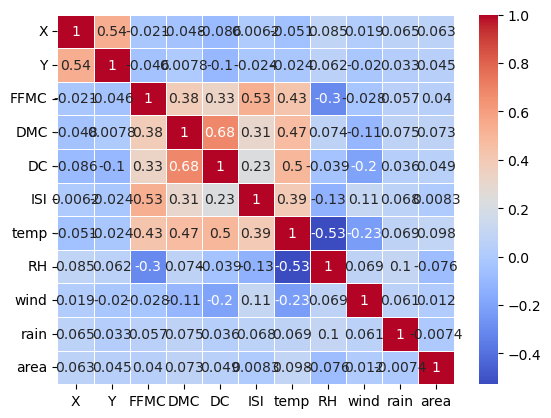

In [10]:
#correlation matrix 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.show()

In [11]:
#Feature Engineering

In [12]:
# Interaction terms example: temp * RH (relative humidity)
df["temp_RH_interaction"] = df["temp"] * df["RH"]

In [13]:
df['wind_temp_interaction'] = df['wind'] * df['temp']

In [14]:
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.model_selection import train_test_split

In [15]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [16]:
df_poly = poly.fit_transform(df[['temp', 'wind']])

In [17]:
# The columns generated will be 'temp', 'wind', 'temp*wind', 'temp^2', 'wind^2'
# We need to name these columns appropriately
columns_poly = ['temp', 'wind', 'temp_wind_interaction', 'temp_squared', 'wind_squared']
df_poly = pd.DataFrame(df_poly, columns=columns_poly)

In [18]:
df = pd.concat([df, df_poly[['temp_wind_interaction', 'temp_squared', 'wind_squared']]], axis=1)

In [19]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,temp_RH_interaction,wind_temp_interaction,temp_wind_interaction,temp_squared,wind_squared
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,418.2,54.94,67.24,54.94,44.89
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,594.0,16.20,324.00,16.20,0.81
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,481.8,18.98,213.16,18.98,1.69
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,805.1,33.20,68.89,33.20,16.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1128.6,20.52,129.96,20.52,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,889.6,75.06,772.84,75.06,7.29
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1554.9,127.02,479.61,127.02,33.64
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1484.0,142.04,449.44,142.04,44.89
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1075.2,102.40,655.36,102.40,16.00


In [20]:
# Binning temperature into categories
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['temp_binned'] = discretizer.fit_transform(df[['temp']])

In [21]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,temp_RH_interaction,wind_temp_interaction,temp_wind_interaction,temp_squared,wind_squared,temp_binned
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,418.2,54.94,67.24,54.94,44.89,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,594.0,16.20,324.00,16.20,0.81,1.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,481.8,18.98,213.16,18.98,1.69,1.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,805.1,33.20,68.89,33.20,16.00,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1128.6,20.52,129.96,20.52,3.24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,889.6,75.06,772.84,75.06,7.29,2.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1554.9,127.02,479.61,127.02,33.64,1.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1484.0,142.04,449.44,142.04,44.89,1.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1075.2,102.40,655.36,102.40,16.00,2.0


In [23]:
#Assuming month and day are categorical variables
df = pd.get_dummies(df, columns = ["month", "day"], drop_first = True)

In [24]:
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
#Define the target variable and features 
X = df.drop(["area"], axis = 1)
y = df["area"]

In [27]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42)

In [30]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
y_pred = rf_model.predict(X_test)

In [33]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [34]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 24.850651373626377
Mean Squared Error: 11853.436800848951
R-squared: -0.005571429035160946


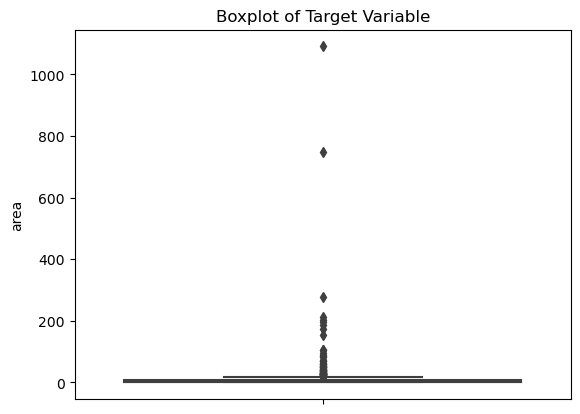

In [35]:
sns.boxplot(y = df["area"])
plt.title("Boxplot of Target Variable")
plt.show()

In [36]:
# Handling outliers - removing data points where 'area' is an outlier
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['area'] < (Q1 - 1.5 * IQR)) | (df['area'] > (Q3 + 1.5 * IQR)))]

In [37]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: -0.20518475164143846


In [39]:
# Train the model with the best parameters
rf_best_model = RandomForestRegressor(**best_params)
rf_best_model.fit(X_train, y_train)

# Make predictions
y_pred_tuned = rf_best_model.predict(X_test)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Mean Absolute Error: {mae_tuned}")
print(f"Tuned Mean Squared Error: {mse_tuned}")
print(f"Tuned R-squared: {r2_tuned}")


Tuned Mean Absolute Error: 24.070201871965114
Tuned Mean Squared Error: 11605.46207578759
Tuned R-squared: 0.015465195433676082


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Absolute Error: {mae_gb}")
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting R-squared: {r2_gb}")


Gradient Boosting Mean Absolute Error: 24.91685132614161
Gradient Boosting Mean Squared Error: 11668.50322325133
Gradient Boosting R-squared: 0.010117178836617113


In [41]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define the base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Define the meta-model
meta_model = Ridge()

# Create the stacking ensemble
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the stacking model
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking Ensemble Mean Absolute Error: {mae_stacking}")
print(f"Stacking Ensemble Mean Squared Error: {mse_stacking}")
print(f"Stacking Ensemble R-squared: {r2_stacking}")


Stacking Ensemble Mean Absolute Error: 24.107149435953698
Stacking Ensemble Mean Squared Error: 11859.065233162788
Stacking Ensemble R-squared: -0.006048910024020637
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END

In [42]:
# Advanced feature engineering example
df['temp_wind_rh_interaction'] = df['temp'] * df['wind'] * df['RH']
df['rain_wind_interaction'] = df['rain'] * df['wind']
df['log_area'] = np.log1p(df['area'])

# Drop highly correlated or less important features if necessary
df.drop(['area'], axis=1, inplace=True)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['log_area']))

# Redefine target variable
y = df['log_area']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomForest
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
rf_best_model = RandomForestRegressor(**best_params)
rf_best_model.fit(X_train, y_train)

# Make predictions
y_pred_tuned = rf_best_model.predict(X_test)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Mean Absolute Error: {mae_tuned}")
print(f"Tuned Mean Squared Error: {mse_tuned}")
print(f"Tuned R-squared: {r2_tuned}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_depth': 20}
Best Score: -0.0697834902639618
Tuned Mean Absolute Error: 0.7792275547484374
Tuned Mean Squared Error: 0.797387866310003
Tuned R-squared: 0.06876040629235358
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=6, min_samples_spli

In [44]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_best_model, X_scaled, y, cv=10, scoring='neg_mean_absolute_error')

# Convert negative scores to positive
cv_scores = -cv_scores

# Print the mean and standard deviation of the cross-validation scores
print(f"Cross-Validation Mean MAE: {cv_scores.mean()}")
print(f"Cross-Validation Standard Deviation MAE: {cv_scores.std()}")


Cross-Validation Mean MAE: 0.8887185235413225
Cross-Validation Standard Deviation MAE: 0.18146202749865584


In [45]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

# Initialize individual models
rf_model = RandomForestRegressor(**best_params)
ridge_model = Ridge()
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('ridge', ridge_model), ('gb', gb_model)])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Mean Absolute Error: {mae_ensemble}")
print(f"Ensemble Model Mean Squared Error: {mse_ensemble}")
print(f"Ensemble Model R-squared: {r2_ensemble}")


Ensemble Model Mean Absolute Error: 0.7786881780587274
Ensemble Model Mean Squared Error: 0.7991167567331575
Ensemble Model R-squared: 0.06674129955240038


In [47]:
from sklearn.feature_selection import RFE

# Initialize the RFE model and the RandomForestRegressor
rfe_model = RFE(estimator=RandomForestRegressor(**best_params), n_features_to_select=10)
rfe_model.fit(X_train, y_train)

# Get the selected features
selected_features = rfe_model.support_

# Transform the data to select only the important features
X_train_rfe = rfe_model.transform(X_train)
X_test_rfe = rfe_model.transform(X_test)

# Retrain the model with selected features
rf_best_model.fit(X_train_rfe, y_train)

# Make predictions with the selected features
y_pred_rfe = rf_best_model.predict(X_test_rfe)

# Evaluate the model with selected features
mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)
r2_rfe = r2_score(y_test, y_pred_rfe)

print(f"RFE Model Mean Absolute Error: {mae_rfe}")
print(f"RFE Model Mean Squared Error: {mse_rfe}")
print(f"RFE Model R-squared: {r2_rfe}")

# Check selected features
selected_feature_names = X.columns[selected_features]
print(f"Selected Features: {selected_feature_names}")



RFE Model Mean Absolute Error: 0.7715848507882352
RFE Model Mean Squared Error: 0.7860285314027508
RFE Model R-squared: 0.08202655049990315


IndexError: boolean index did not match indexed array along dimension 0; dimension is 33 but corresponding boolean dimension is 35

In [48]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge

# Initialize individual models with the selected features
rf_model_rfe = RandomForestRegressor(**best_params)
ridge_model_rfe = Ridge()
gb_model_rfe = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create the ensemble model with selected features
ensemble_model_rfe = VotingRegressor(estimators=[('rf', rf_model_rfe), ('ridge', ridge_model_rfe), ('gb', gb_model_rfe)])

# Train the ensemble model with selected features
ensemble_model_rfe.fit(X_train_rfe, y_train)

# Make predictions with the selected features
y_pred_ensemble_rfe = ensemble_model_rfe.predict(X_test_rfe)

# Evaluate the ensemble model with selected features
mae_ensemble_rfe = mean_absolute_error(y_test, y_pred_ensemble_rfe)
mse_ensemble_rfe = mean_squared_error(y_test, y_pred_ensemble_rfe)
r2_ensemble_rfe = r2_score(y_test, y_pred_ensemble_rfe)

print(f"Ensemble Model with RFE Mean Absolute Error: {mae_ensemble_rfe}")
print(f"Ensemble Model with RFE Mean Squared Error: {mse_ensemble_rfe}")
print(f"Ensemble Model with RFE R-squared: {r2_ensemble_rfe}")


Ensemble Model with RFE Mean Absolute Error: 0.777202261173069
Ensemble Model with RFE Mean Squared Error: 0.798447706034479
Ensemble Model with RFE R-squared: 0.06752265894740905


In [49]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('rf', RandomForestRegressor(**best_params)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('ridge', Ridge())
]

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking ensemble
stacking_model_rfe = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking ensemble with selected features
stacking_model_rfe.fit(X_train_rfe, y_train)

# Make predictions with the stacking ensemble
y_pred_stacking_rfe = stacking_model_rfe.predict(X_test_rfe)

# Evaluate the stacking ensemble with selected features
mae_stacking_rfe = mean_absolute_error(y_test, y_pred_stacking_rfe)
mse_stacking_rfe = mean_squared_error(y_test, y_pred_stacking_rfe)
r2_stacking_rfe = r2_score(y_test, y_pred_stacking_rfe)

print(f"Stacking Ensemble with RFE Mean Absolute Error: {mae_stacking_rfe}")
print(f"Stacking Ensemble with RFE Mean Squared Error: {mse_stacking_rfe}")
print(f"Stacking Ensemble with RFE R-squared: {r2_stacking_rfe}")


Stacking Ensemble with RFE Mean Absolute Error: 0.8155763108244866
Stacking Ensemble with RFE Mean Squared Error: 0.8292700511866182
Stacking Ensemble with RFE R-squared: 0.03152638989277545


In [50]:
from catboost import CatBoostRegressor

# Initialize the CatBoost model
catboost_model = CatBoostRegressor(verbose=0, random_state=42)

# Train the model with the selected features
catboost_model.fit(X_train_rfe, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test_rfe)

# Evaluate the CatBoost model
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost Model Mean Absolute Error: {mae_catboost}")
print(f"CatBoost Model Mean Squared Error: {mse_catboost}")
print(f"CatBoost Model R-squared: {r2_catboost}")


CatBoost Model Mean Absolute Error: 0.7636364908933584
CatBoost Model Mean Squared Error: 0.9285720994636272
CatBoost Model R-squared: -0.08444477420300145


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter search space
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Perform the search
random_search.fit(X_train_rfe, y_train)

# Get the best parameters and train the final model
best_params_random = random_search.best_params_
rf_random_model = RandomForestRegressor(**best_params_random, random_state=42)
rf_random_model.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model
y_pred_random = rf_random_model.predict(X_test_rfe)
mae_random = mean_absolute_error(y_test, y_pred_random)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print(f"RandomizedSearchCV Optimized RF Mean Absolute Error: {mae_random}")
print(f"RandomizedSearchCV Optimized RF Mean Squared Error: {mse_random}")
print(f"RandomizedSearchCV Optimized RF R-squared: {r2_random}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
RandomizedSearchCV Optimized RF Mean Absolute Error: 0.787047586213665
RandomizedSearchCV Optimized RF Mean Squared Error: 0.8118110291397691
RandomizedSearchCV Optimized RF R-squared: 0.05191613155347907
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=20, n_estimators=400; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=8, min_samples_split=20, n_estimators=800; total time=   1.1s
[CV] END max_depth=50, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=30, min_samples_leaf=6, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=50, min_samples_leaf=8, min_samples_split=5, n_estimators=1000; total time=   1.4s
[CV] END max_depth